In [91]:
import pandas as pd
import seaborn as sns
import os

In [3]:
cwd = os.getcwd()
print(cwd)

/Volumes/Work/Projects/cpiprediction/notebooks


In [6]:
overall_raw = pd.read_excel("../data/raw/CPIOverall.xlsx")
housing_raw = pd.read_excel("../data/raw/Housing.xlsx")
apparel_raw = pd.read_excel("../data/raw/Apparel.xlsx")
transportation_raw = pd.read_excel("../data/raw/Transportation.xlsx")
education_raw = pd.read_excel("../data/raw/Education.xlsx")
medical_raw = pd.read_excel("../data/raw/MedicalCare.xlsx")
food_raw = pd.read_excel("../data/raw/Food.xlsx")
recreation_raw = pd.read_excel("../data/raw/Recreation.xlsx")
other_goods_raw = pd.read_excel("../data/raw/OtherGoods.xlsx")

In [79]:
# data transformation into time series data
def transform_data(df):
    transformed_data = []
    months = df.loc[:,df.columns.drop("Year")].columns
    for data_tuple in df.itertuples():
        year = getattr(data_tuple,'Year')
        for month in months:
            value = getattr(data_tuple,month)
            transformed_data.append(['01' + ' ' + str(month) + ' ' + str(year),value])
    transformed_df = pd.DataFrame(transformed_data, columns = ['time', 'value'])
    transformed_df['time'] = pd.to_datetime(transformed_df['time'])
    return transformed_df

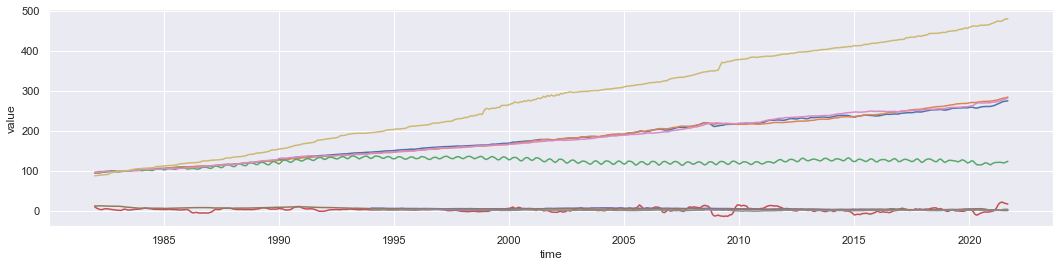

In [95]:
cpi_overall = transform_data(overall_raw)
cpi_factors = [overall_raw,housing_raw,apparel_raw,transportation_raw,education_raw,
        medical_raw,food_raw,recreation_raw,other_goods_raw]
sns.set(rc={'figure.figsize':(18, 4)})

for cpi_factor in cpi_factors:
    cpi_factor = transform_data(cpi_factor)
    sns.lineplot(x="time",y="value",data = cpi_factor)
    
# overall = transform_data(overall_raw)
# housing = transform_data(housing_raw)
# apparel = transform_data(apparel_raw)
# transport = transform_data(transportation_raw)
# education = transform_data(education_raw)
# medical = transform_data(medical_raw)
# food = transform_data(food_raw)
# recreation = transform_data(recreation_raw)
# other_goods = transform_data(other_goods_raw)